In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from math import pi

In [3]:
creditcard_df = pd.read_csv('Marketing_data.csv')
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Visualizing the dataset

In [6]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


<Axes: >

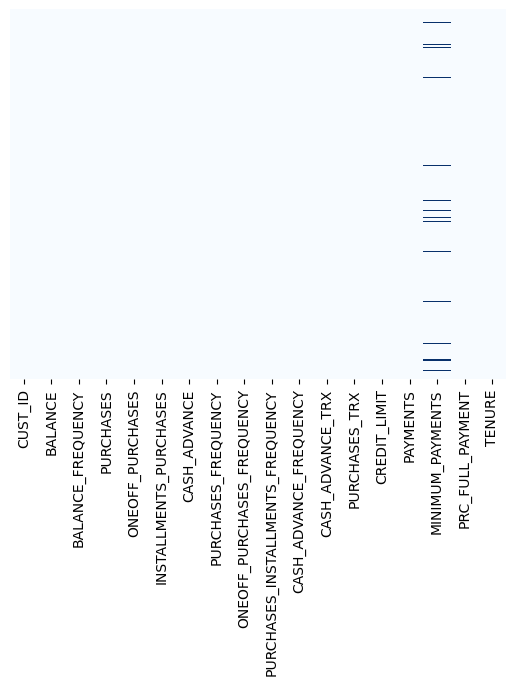

In [8]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [9]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [11]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

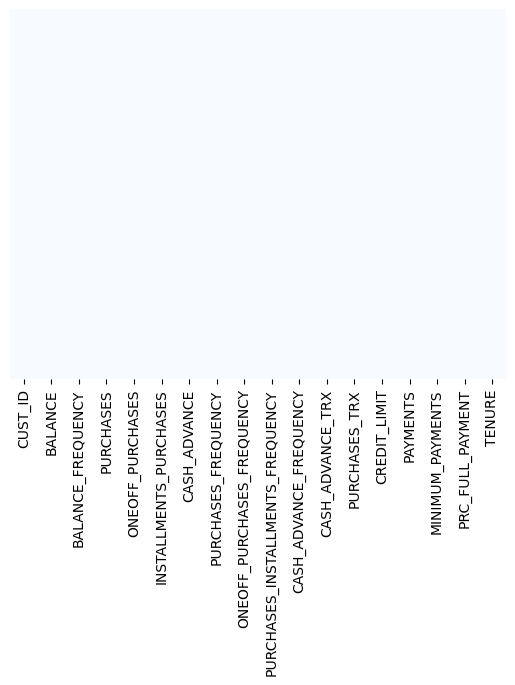

In [12]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [13]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [14]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [15]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
n = len(creditcard_df.columns)
n

17

In [17]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

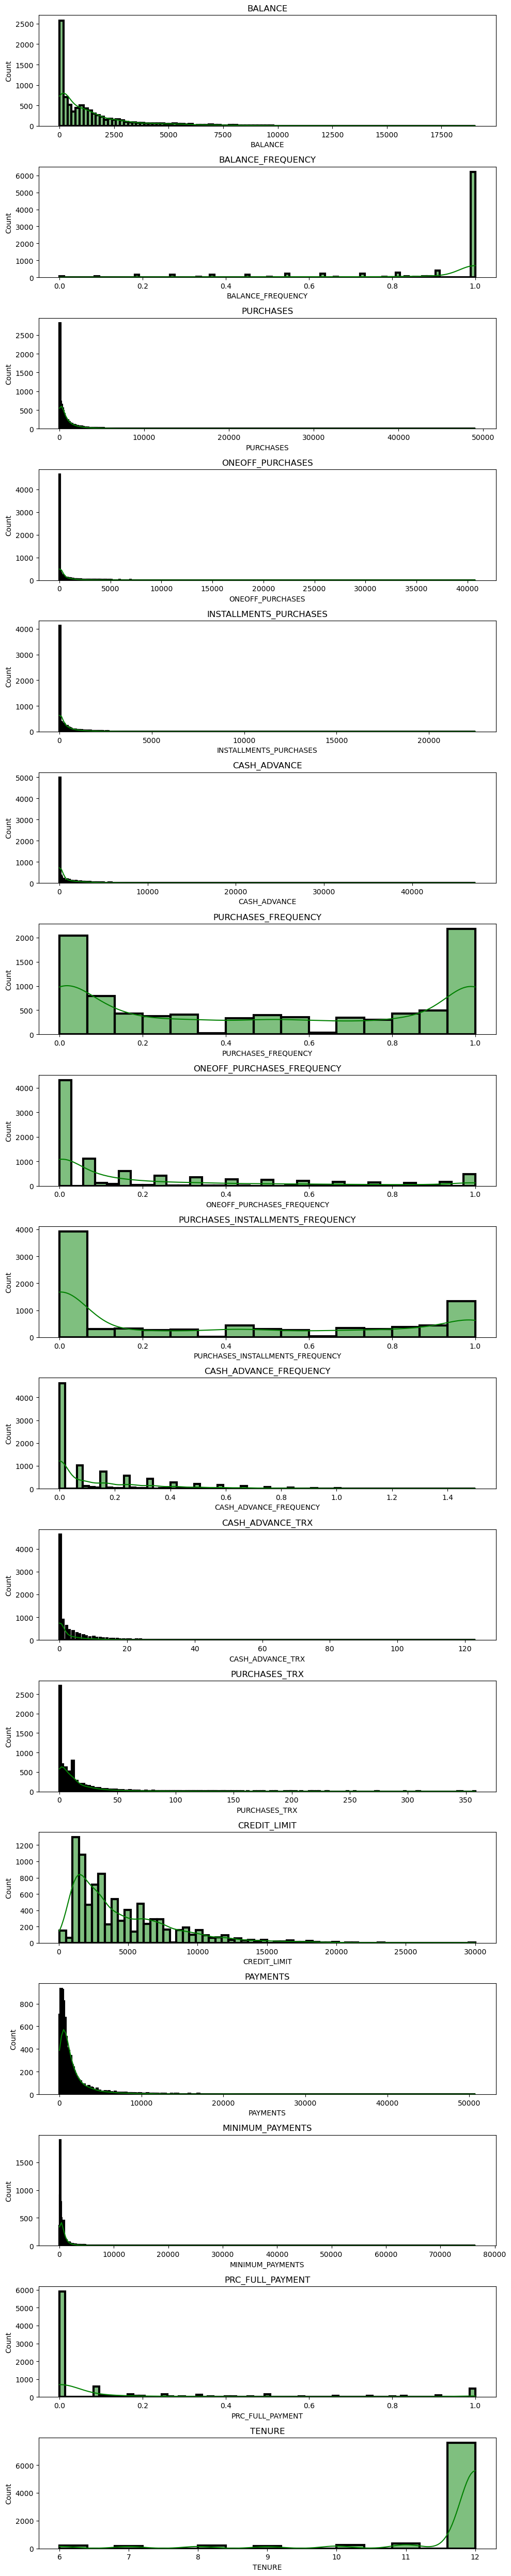

In [18]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10, 50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.histplot(creditcard_df[creditcard_df.columns[i]], kde=True, color="g", linewidth=3, label="KDE")
    plt.title(creditcard_df.columns[i])
plt.tight_layout()





In [19]:
correlations = creditcard_df.corr()

<Axes: >

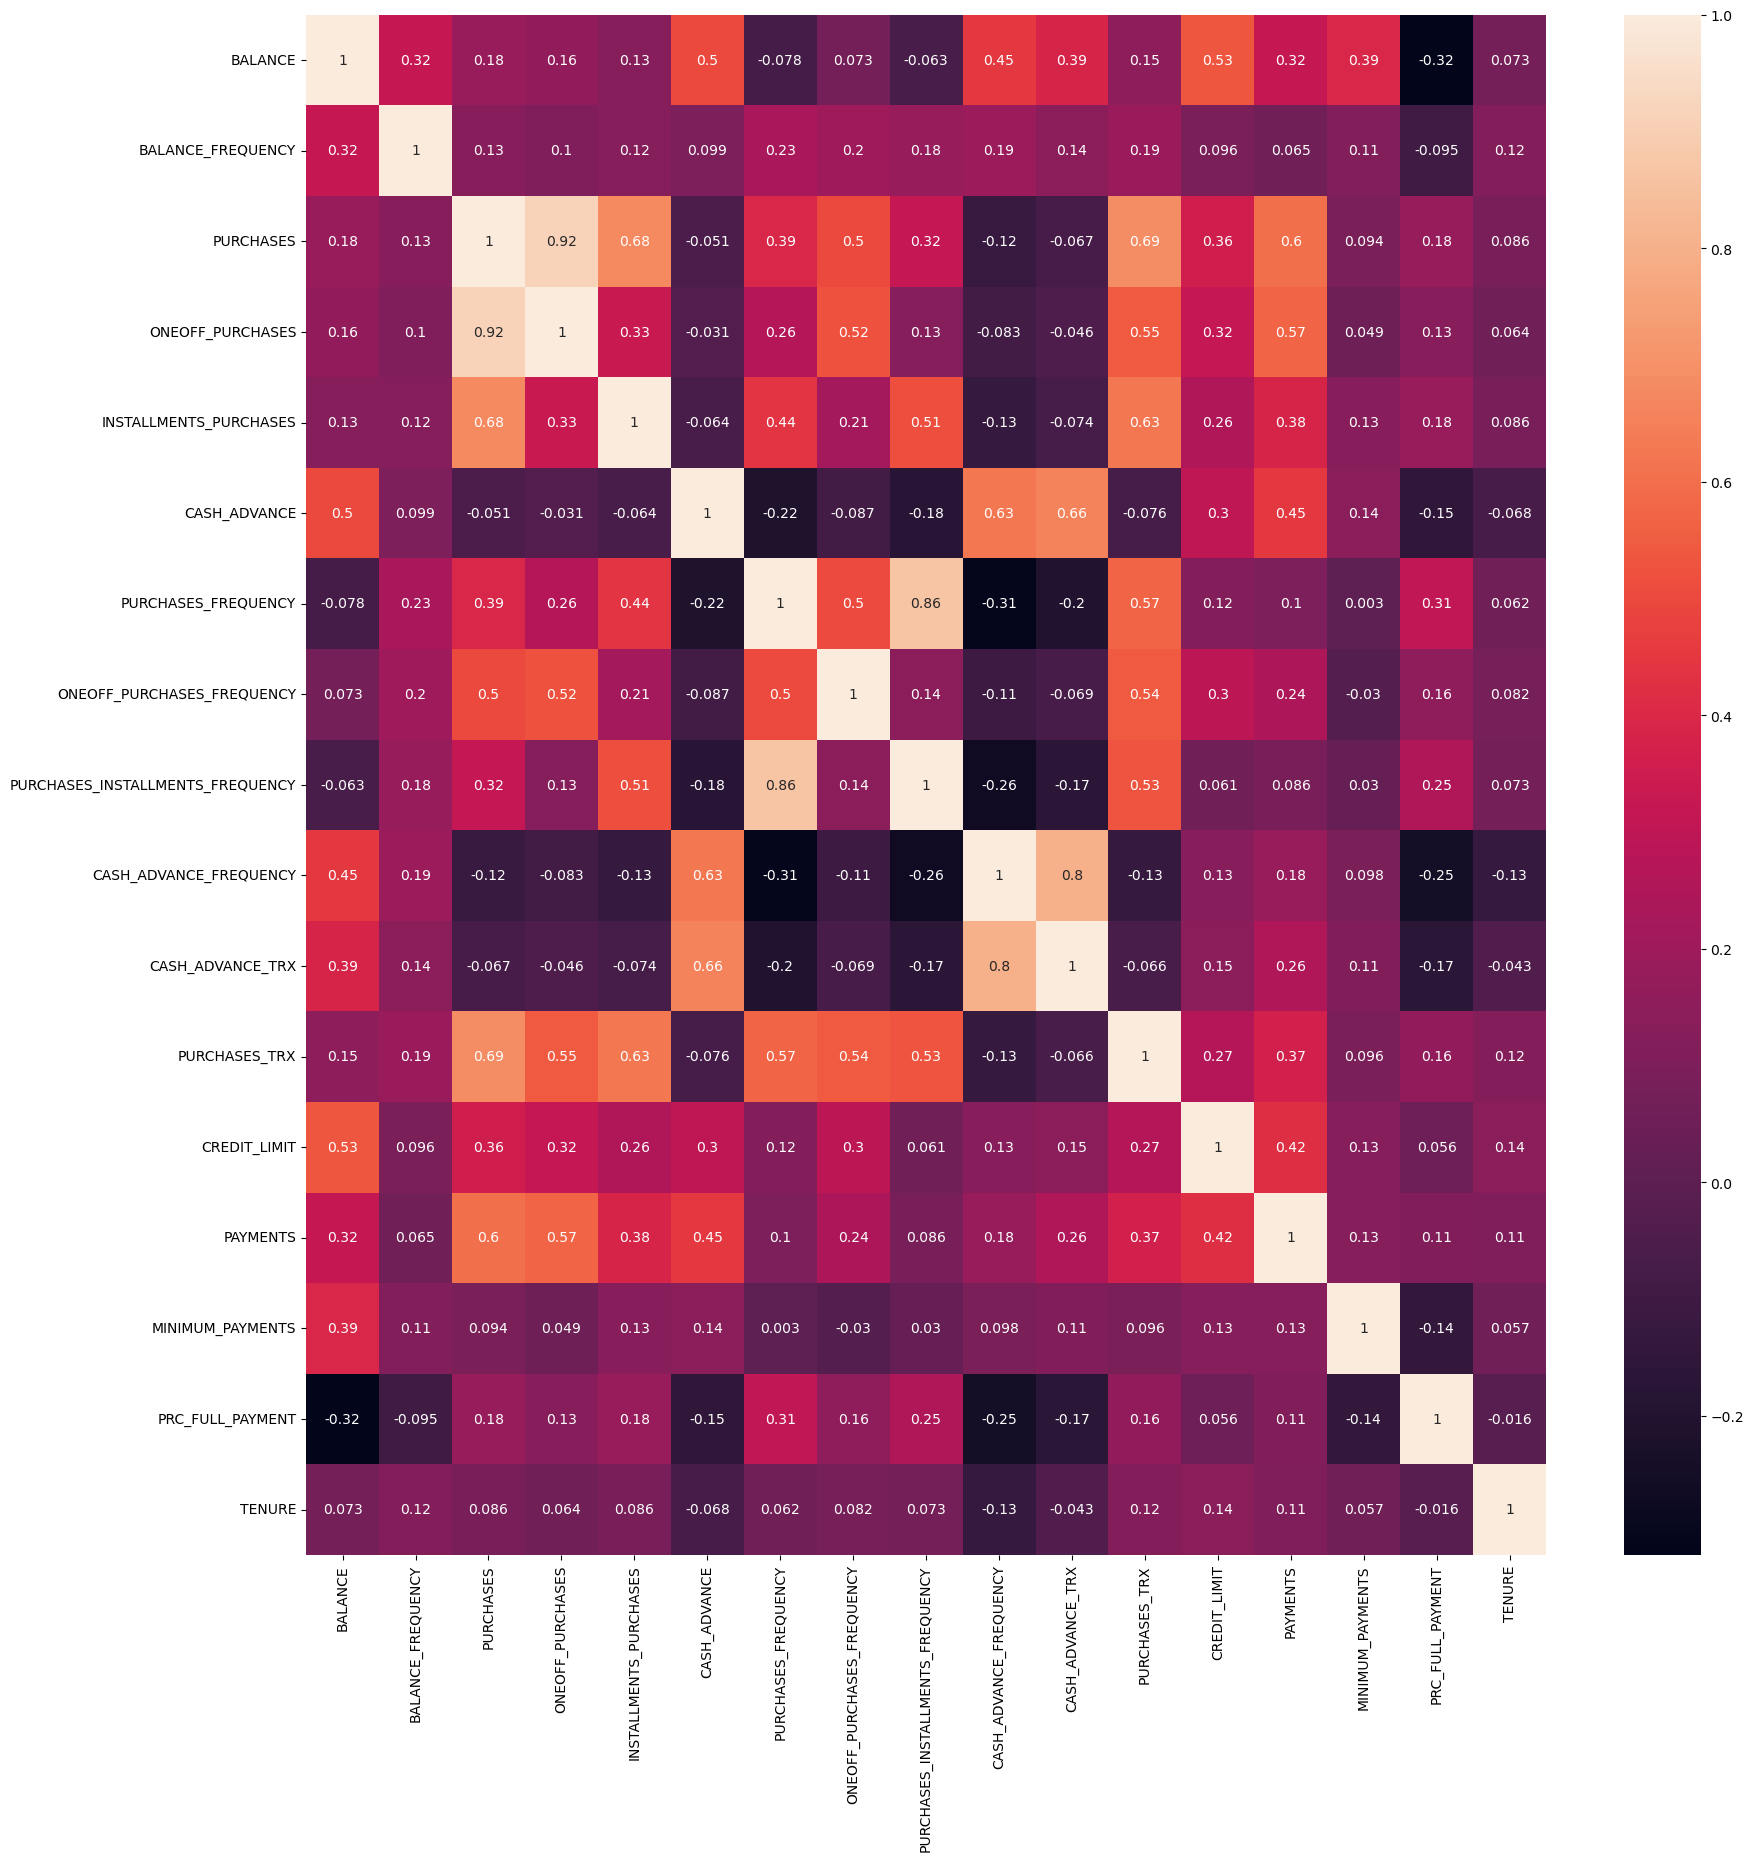

In [20]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [21]:
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

In [22]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [23]:
creditcard_df_scaled.shape

(8950, 17)

In [24]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

# DBSCAN Algorithm

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Finding the optimal values of min samples and Epsilon

Optimal parameters for 3 clusters:
eps: 4.0, min_samples: 3, num_clusters: 3, silhouette_score: 0.6239437244303323


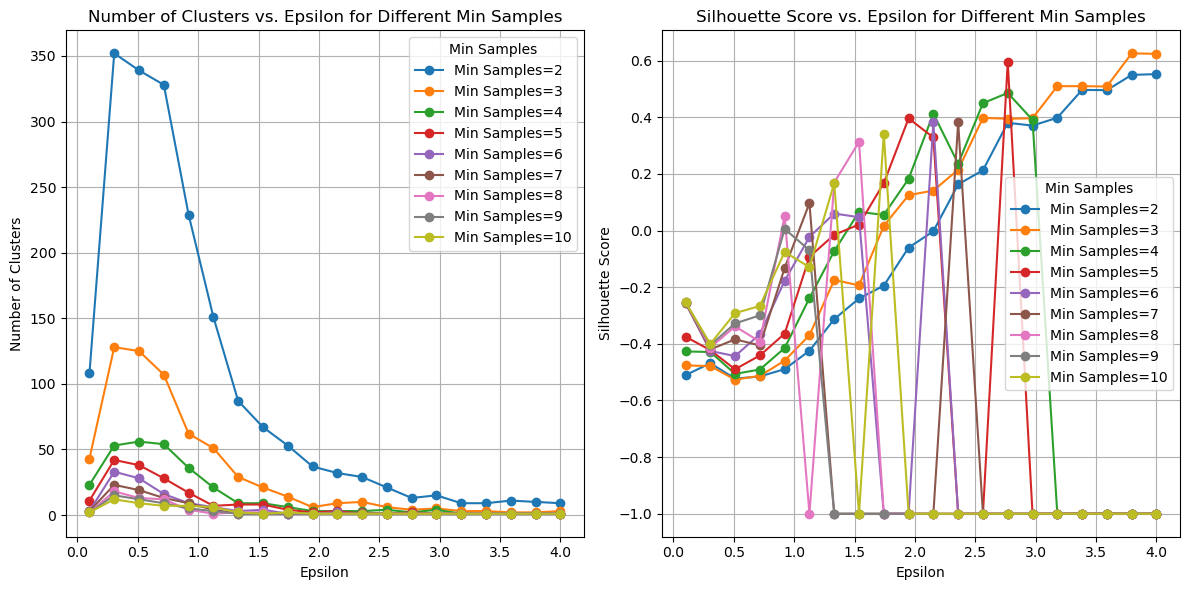

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


# Define ranges for epsilon and min_samples
eps_values = np.linspace(0.1, 4.0, 20)  # Adjust range as needed
min_samples_values = range(2, 11)  # Adjust range as needed

# Lists to store results
num_clusters_matrix = np.zeros((len(eps_values), len(min_samples_values)))
silhouette_scores_matrix = np.zeros((len(eps_values), len(min_samples_values)))

# Initialize optimal parameters
optimal_eps = None
optimal_min_samples = None
optimal_num_clusters = 0
optimal_silhouette_score = -1

# Nested loop for eps and min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(creditcard_df_scaled)
        cluster_labels = dbscan.labels_
        
        # Calculate number of clusters
        num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        num_clusters_matrix[i, j] = num_clusters

        # Calculate silhouette score
        if num_clusters > 1:  # Silhouette score requires at least 2 clusters
            silhouette_avg = silhouette_score(creditcard_df_scaled, cluster_labels)
        else:
            silhouette_avg = -1  # No meaningful silhouette score for 1 cluster
        silhouette_scores_matrix[i, j] = silhouette_avg

        # Update optimal parameters if conditions are met
        if silhouette_avg > optimal_silhouette_score and num_clusters == 3:
            optimal_eps = eps
            optimal_min_samples = min_samples
            optimal_num_clusters = num_clusters
            optimal_silhouette_score = silhouette_avg

# Print optimal parameters
print("Optimal parameters for 3 clusters:")
print(f"eps: {optimal_eps}, min_samples: {optimal_min_samples}, num_clusters: {optimal_num_clusters}, silhouette_score: {optimal_silhouette_score}")

# Plotting results
plt.figure(figsize=(12, 6))

# Plotting number of clusters vs. epsilon for different min_samples
plt.subplot(1, 2, 1)
for j, min_samples in enumerate(min_samples_values):
    plt.plot(eps_values, num_clusters_matrix[:, j], label=f'Min Samples={min_samples}', marker='o')
plt.title('Number of Clusters vs. Epsilon for Different Min Samples')
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.legend(title='Min Samples')
plt.grid(True)

# Plotting silhouette score vs. epsilon for different min_samples
plt.subplot(1, 2, 2)
for j, min_samples in enumerate(min_samples_values):
    plt.plot(eps_values, silhouette_scores_matrix[:, j], label=f'Min Samples={min_samples}', marker='o')
plt.title('Silhouette Score vs. Epsilon for Different Min Samples')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.legend(title='Min Samples')
plt.grid(True)

plt.tight_layout()
plt.show()


# Cluster centres

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming 'creditcard_df_scaled' contains your scaled data

# Fit DBSCAN with adjusted parameters to obtain 3 clusters
dbscan = DBSCAN(eps=4, min_samples=3)
dbscan.fit(creditcard_df_scaled)

# Convert cluster labels to start from 0 and be contiguous
label_encoder = LabelEncoder()
labels_contiguous = label_encoder.fit_transform(dbscan.labels_)

# The 'labels_contiguous' variable now contains the cluster labels starting from 0
print("Cluster labels assigned by DBSCAN (contiguous):")
print(labels_contiguous)


Cluster labels assigned by DBSCAN (contiguous):
[1 1 1 ... 1 1 1]


In [28]:
import pandas as pd
import numpy as np

# Assuming 'creditcard_df' contains your original data and 'labels_contiguous' contains the cluster labels assigned by DBSCAN

# Initialize an empty list to store cluster centers
cluster_centers_list = []

# Compute cluster centers
for cluster_label in np.unique(labels_contiguous):
    if cluster_label == -1:
        continue  # Skip noise points
    cluster_data = creditcard_df[labels_contiguous == cluster_label]
    cluster_center = cluster_data.mean()
    cluster_centers_list.append(cluster_center)

# Convert the list of cluster centers to a DataFrame
cluster_centers = pd.DataFrame(cluster_centers_list, columns=creditcard_df.columns)

# Display cluster centers
print("Cluster centers computed from DBSCAN:")
print(cluster_centers)


Cluster centers computed from DBSCAN:
       BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
0  4605.025547           0.934910   5051.653270       3202.924319   
1  1393.864500           0.873907    767.013448        439.543688   
2   871.739583           1.000000  11332.260000      10394.672500   
3   725.642958           1.000000   7736.692500       3050.890000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0             1850.032935   3958.605947             0.704837   
1              327.713662    811.785687             0.477783   
2              937.587500    218.895768             1.000000   
3             4685.802500      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.436801                          0.554818   
1                    0.188617                          0.353266   
2                    1.000000                          0.687500   
3                    0.7500

In [29]:
# Assuming 'scaler' is the StandardScaler instance used for scaling

# Inverse transform cluster centers
cluster_centers_inverse = scaler.inverse_transform(cluster_centers)

# Convert to DataFrame
cluster_centers_df = pd.DataFrame(data=cluster_centers_inverse, columns=creditcard_df.columns)

# Display cluster centers
print("Cluster centers computed from DBSCAN (inverse transformed):")
print(cluster_centers_df)


Cluster centers computed from DBSCAN (inverse transformed):
        BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
0  9.586536e+06           1.098742  1.079394e+07      5.316791e+06   
1  2.902776e+06           1.084291  1.639739e+06      7.301449e+05   
2  1.816017e+06           1.114161  2.421255e+07      1.725362e+07   
3  1.511929e+06           1.114161  1.653057e+07      5.064445e+06   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0            1.673373e+06  8.302360e+06             0.773236   
1            2.967585e+05  1.703331e+06             0.682108   
2            8.482598e+05  4.600135e+05             0.891699   
3            4.237724e+06  9.788711e+02             0.891699   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.332764                          0.584936   
1                    0.258726                          0.504834   
2                    0.500777                          0.637667   


In [30]:
labels_contiguous.shape 

(8950,)

In [31]:
labels_contiguous.max()

3

In [32]:
labels_contiguous.min()

0

In [33]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming 'creditcard_df_scaled' contains your scaled data

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=4.0, min_samples=3)
labels = dbscan.fit_predict(creditcard_df_scaled)

# The 'labels' variable now contains the cluster labels assigned by DBSCAN to each data point
print("Cluster labels assigned by DBSCAN:")
print(labels)




Cluster labels assigned by DBSCAN:
[0 0 0 ... 0 0 0]


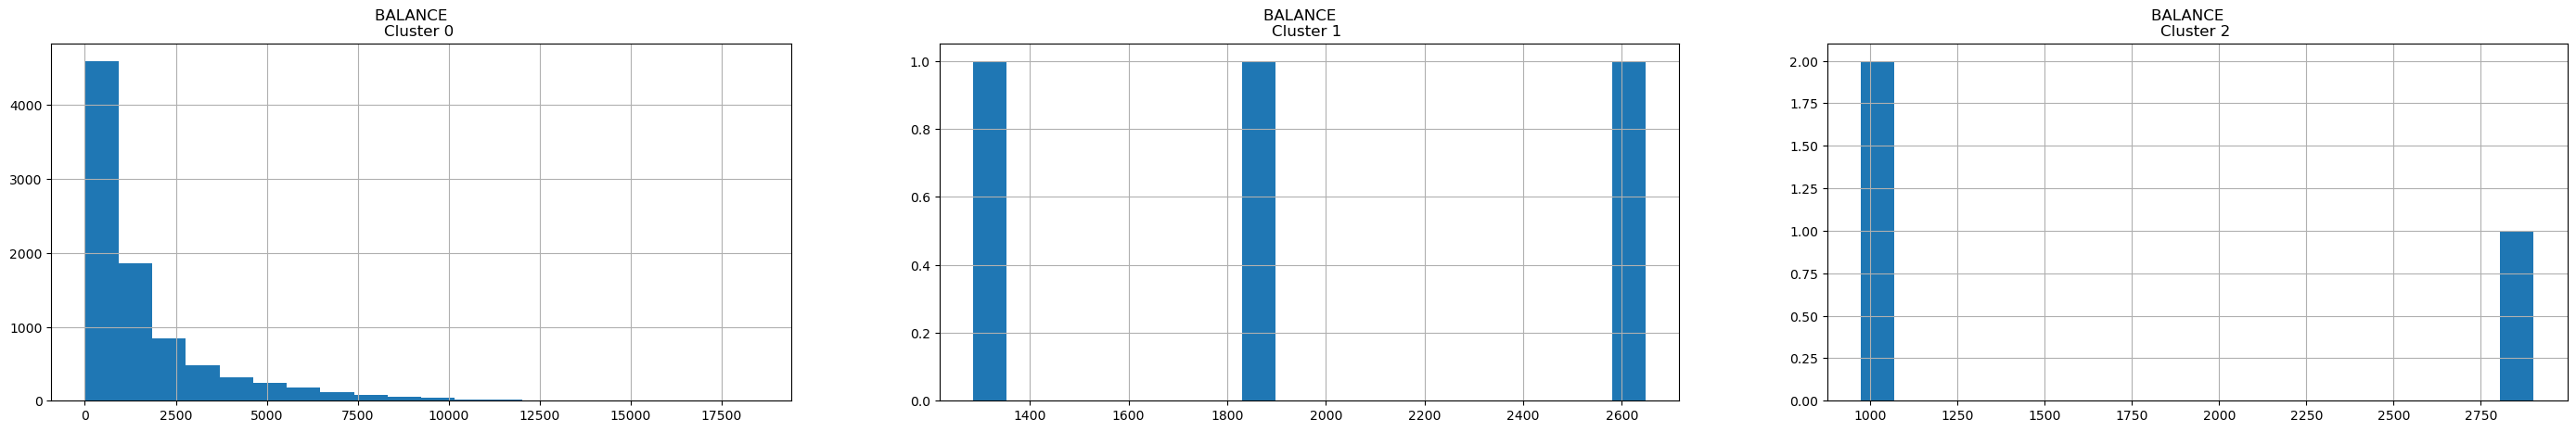

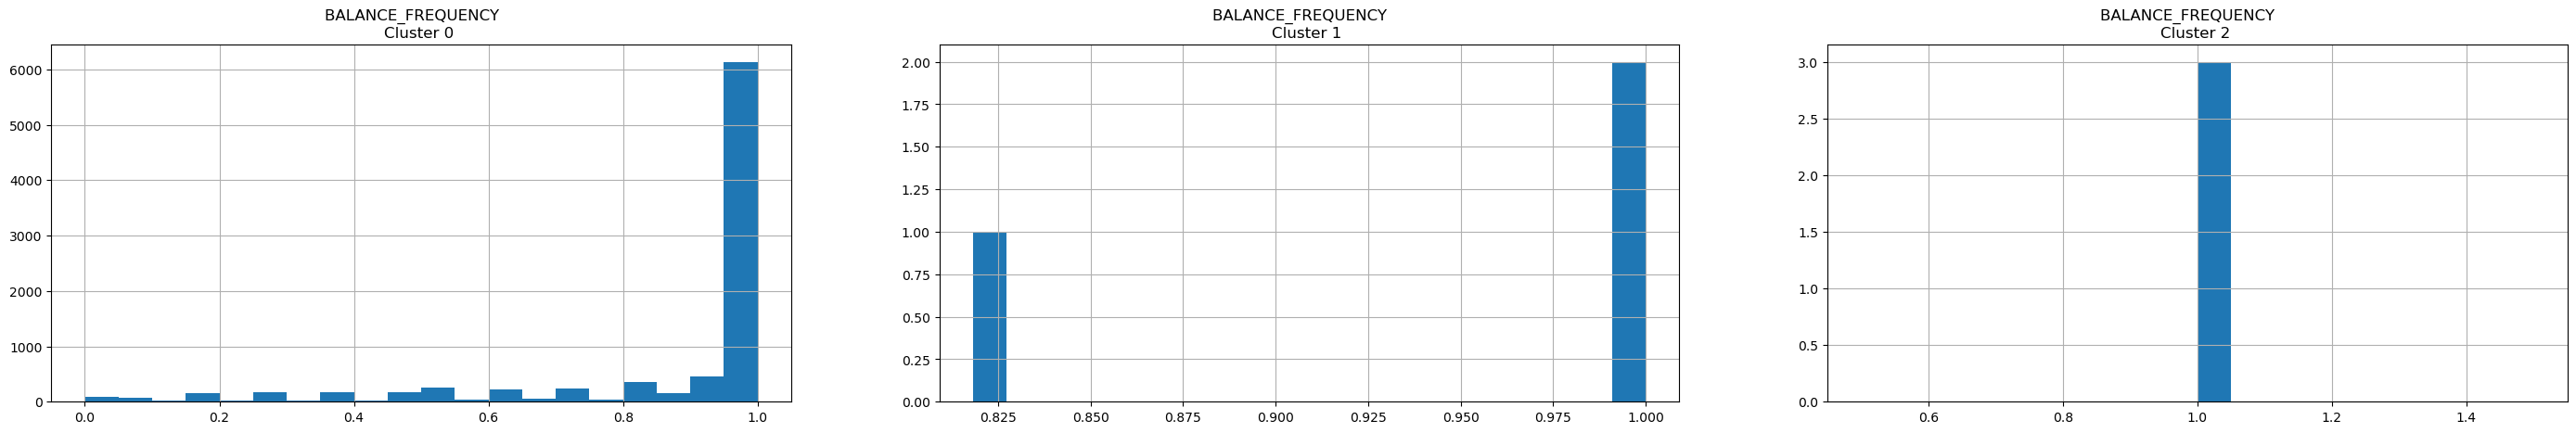

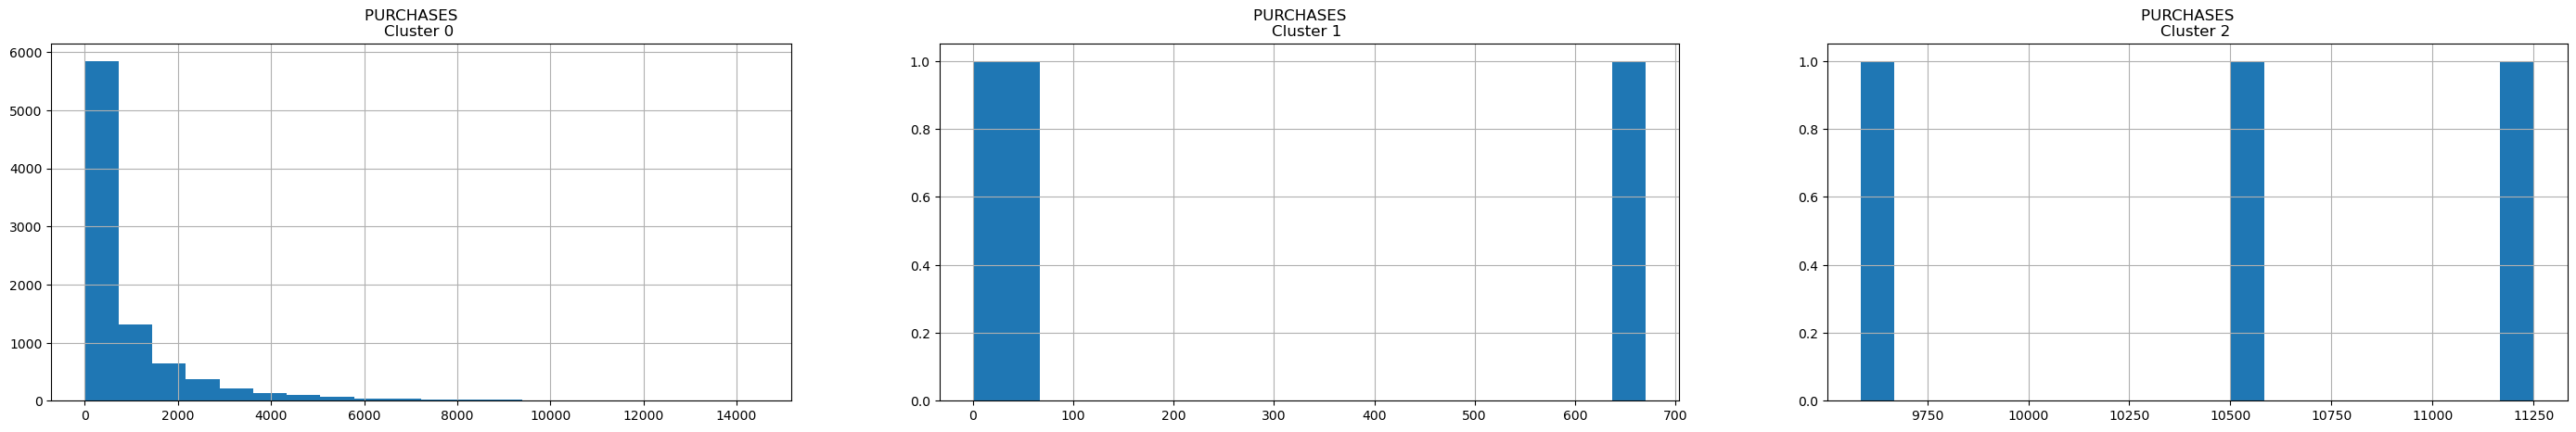

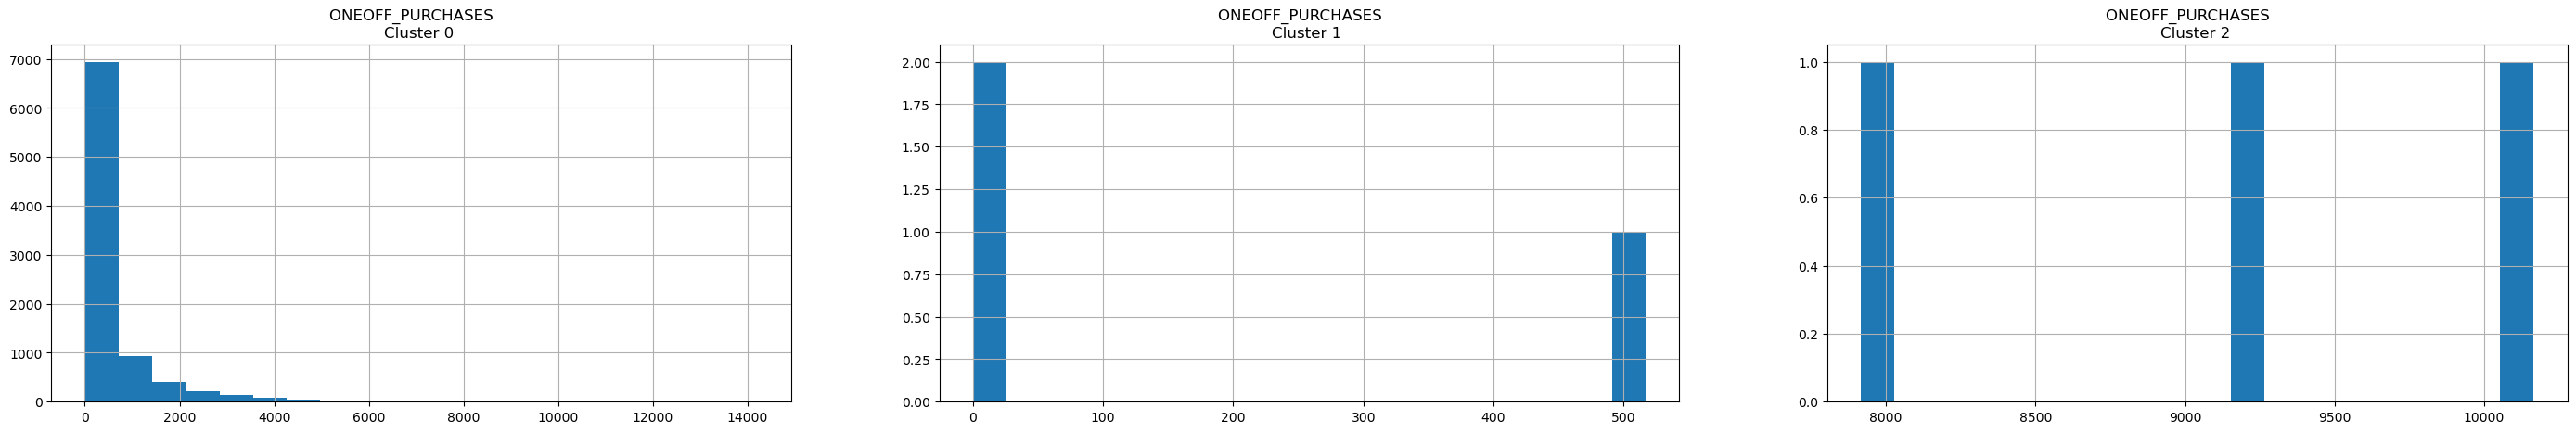

In [ ]:
# Assuming 'creditcard_df' contains your original data and 'labels' contains the cluster labels assigned by DBSCAN

# Plot the histogram of various clusters
for feature in creditcard_df.columns:
    plt.figure(figsize=(35, 5))
    unique_labels, counts = np.unique(labels, return_counts=True)
    num_clusters = len(unique_labels[unique_labels != -1])  # Exclude noise points (-1) from cluster count
    num_subplots = min(num_clusters, 4)  # Limit subplots to 4 clusters
    non_noise_labels = unique_labels[unique_labels != -1]
    for i, cluster_label in enumerate(non_noise_labels):
        cluster_data = creditcard_df[labels == cluster_label]
        plt.subplot(1, num_subplots, i + 1)  # Adjust indexing here
        cluster_data[feature].hist(bins=20)
        plt.title('{}    \nCluster {} '.format(feature, cluster_label))
    
    plt.show()

In [ ]:
# Assuming 'creditcard_df_scaled' contains your scaled data and 'labels' are from DBSCAN
dbscan = DBSCAN(eps=4, min_samples=3)
dbscan.fit(creditcard_df_scaled)
labels = dbscan.labels_
unique_labels = np.unique(labels[labels != -1])  # Exclude noise if present

# Prepare DataFrame for cluster centers
cluster_centers_list = []
for label in unique_labels:
    cluster_mask = (labels == label)
    cluster_data = creditcard_df_scaled[cluster_mask]
    cluster_center = np.mean(cluster_data, axis=0)
    cluster_centers_list.append(cluster_center)

cluster_centers = np.array(cluster_centers_list)




In [ ]:
# Normalize the cluster centers

scaler = MinMaxScaler()
cluster_centers_normalized = scaler.fit_transform(cluster_centers)



In [ ]:


# Set the number of variables to plot
num_vars = creditcard_df_scaled.shape[1]
labels = creditcard_df.columns

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Plot each cluster
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, center in enumerate(cluster_centers_normalized):
    data = np.concatenate((center, [center[0]]))  # Close the loop
    ax.plot(angles, data, linewidth=2, linestyle='solid', label=f'Cluster {unique_labels[i]}')
    ax.fill(angles, data, alpha=0.25)

# Decorate the plot with axis labels
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

In [ ]:
# Assuming 'cluster_centers_normalized' contains the cluster centers and 'unique_labels' contains the cluster labels

# Create a DataFrame to store the mean value of each feature for each cluster
cluster_means = pd.DataFrame(cluster_centers_normalized, columns=labels)
cluster_means['Cluster'] = unique_labels

# Group by cluster and calculate the mean value for each feature
cluster_means = cluster_means.groupby('Cluster').mean()

# Find the top 5 features for each cluster based on their mean values
top_features_per_cluster = {}
for cluster_label in unique_labels:
    top_features_per_cluster[cluster_label] = cluster_means.loc[cluster_label].nlargest(5).index.tolist()


for cluster_label, top_features in top_features_per_cluster.items():
    print(f"Cluster {cluster_label}: {', '.join(top_features)}")